In [91]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import io
import re
import itertools
import zipfile

#!pip install pyshp
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [93]:
med = pd.read_excel("Medical Devices Africa.xlsx")

In [94]:
med["Women"] = pd.to_numeric(med.Women, errors='coerce')
med["MAM"] = pd.to_numeric(med.MAM, errors='coerce')
med["mamo"] = med["MAM"]/med["Women"]

In [95]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [96]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import sys
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [97]:
orient = earth[earth.continent=='Asia'].copy()
pal = orient[orient.name=='Palestine']
pal.to_csv(r'earth.csv', index = False)

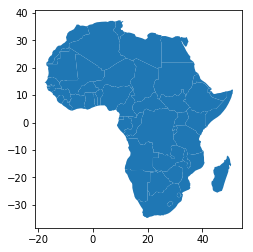

In [98]:
africa.plot()
plt.show()

In [99]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [124]:
africa[['name']].head()

,name
66,Central African Rep.
11,Dem. Rep. Congo
68,Gabon
69,Eq. Guinea
15,Chad


In [101]:
med['name'] = med['Country']
med = med.sort_values(by=['name'])

In [102]:
len(med), len(df)

(54, 48)

In [103]:
df = africa.merge(med, on='name').copy()
df = df.sort_values(by=['name'])
#df[['name', 'Women']]

In [123]:
med['summe'] = round((med['CT'] + med['MRI'] + med['PET'] + med['GC'] + med['LA'] + med['TU'] + med['R'] + med['mamo']),1)
df = africa.merge(med, on='name').copy()

df.sort_values(by=['summe'], inplace=True, ascending=False)
df[['Country', "summe"]].head()

,Country,summe
2,Gabon,23.4
22,Tunisia,17.8
25,Libya,17.3
32,Namibia,15.7
36,Mauritania,7.8


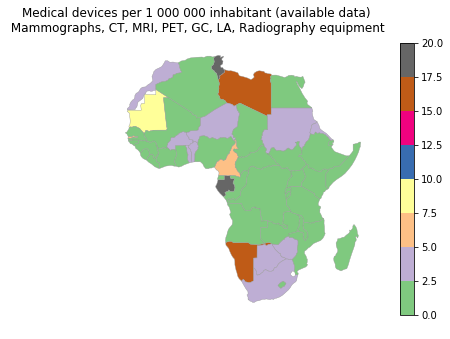

In [121]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
#cmap = cm.get_cmap('Paired')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Accent')

#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1,1,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Medical devices per 1 000 000 inhabitant (available data)\n Mammographs, CT, MRI, PET, GC, LA, Radiography equipment')
# Make the CartoPy plot
line1 = df.plot(column='summe', cmap=cmap, legend=True, linewidth=0.4, ax=axs, edgecolor='0.6', vmin=0, vmax=20)
axs.axis('off')
plt.savefig(r'med6.png')
plt.show()

In [122]:
med[['Country', "summe"]].head()

,Country,summe
41,Seychelles,35.4
6,Cabo Verde,28.3
19,Gabon,23.4
32,Mauritius,22.6
50,Tunisia,17.8
